# Transformada de Fourier (FFT)

Esse código implementa uma análise baseada na Transformada de Fourier (FFT) para processar imagens, destacando diferentes aspectos como espectro, fase, reconstrução via FFT inversa e visualizações 3D. Utiliza bibliotecas como NumPy, SciPy e OpenCV.

## Descrição

A Transformada de Fourier é uma ferramenta matemática amplamente utilizada no processamento digital de imagens. Com ela é possível transformar uma imagem do domínio espacial para o domínio da frequência. Quando no domínio da frequência é mais fácil analisar e modificar os conteúdos de uma imagem de acordo com suas frequências.

- **Domínio Espacial:**

    No domínio Espacial cada pixel representa uma intensidade de luz ou cor em um local específico, operações como convolução ou filtragem são realizadas diretamente nos valores dos pixels.

- **Domínio da Frequência:**

    No domínio da Frequência a imagem é representada por componentes que descrevem como os valores dos pixels mudam ao longo do espaço

    **Baixas frequências:** Representam mudanças lentas, como áreas homogêneas ou suavizadas.
    
    **Altas frequências:** Representam mudanças rápidas, como bordas e detalhes.

A Transformada de Fourier Discreta (DFT) para uma imagem 2D 𝑓(𝑥,𝑦) é definida como:

```math
F(u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) \cdot e^{-j 2 \pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
```

**F(u,v):** Representação no domínio da frequência.

**𝑓(𝑥,y):** Valor do pixel no domínio espacial.

**𝑢,𝑣:** Coordenadas no domínio da frequência.

**𝑀,𝑁:** Dimensões da imagem.

**𝑒^−𝑗2𝜋:** Termo exponencial complexo que relaciona as frequências.

## Código

- **Transformada de Fourier**

    Converte uma imagem para escala de cinza, aplica a FFT bidimensional e centraliza as frequências.

    ```python
    def fft(imagem):
        img = imagem.convert("L")
        img = np.array(imagem)
        fft = np.fft.fft2(img)
        fft = np.fft.fftshift(fft)
        return fft
    ```

- **Transformada de Fourier Inversa**

    Reverte a transformação FFT usando a IFFT (transformada inversa).

    ```python  
    def inverse_fft(fft):
        ifft = np.fft.ifftshift(fft)
        ifft = np.fft.ifft2(ifft)
        return np.real(ifft)
    ```

- **Visualizar**

    - Mostra o espectro de magnitude e a fase da FFT de uma imagem.

        ```python
        def espectro(imagem):
            img = np.array(imagem)
            return np.fft.fftshift(np.fft.fft2(img))

        def fase(imagem):
            img = np.array(imagem)
            return np.angle(np.fft.fftshift(np.fft.fft2(img)))

        def plotFFT(imagem):
            e = espectro(imagem)
            f = fase(imagem)
            plot(np.log(1 + np.abs(e)), f, "Espectro", "Fase")
        ```

    - Gera uma visualização tridimensional do espectro de magnitude.

        ```python
        def plot3d(imagem):
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            img = np.array(imagem)
            e = np.log(1 + np.abs(espectro(img)))
            x = np.arange(e.shape[1])
            y = np.arange(e.shape[0])
            X, Y = np.meshgrid(x, y)
            ax.plot_surface(X, Y, e, cmap='viridis')
            ax.set_title('Espectro 3D')
            plt.show()
        ```

### Codigo final

Escolha a imagem: 
1 - Car
2 - Lena
3 - Newspaper
4 - Indian
5 - Sinc
6 - Gerada


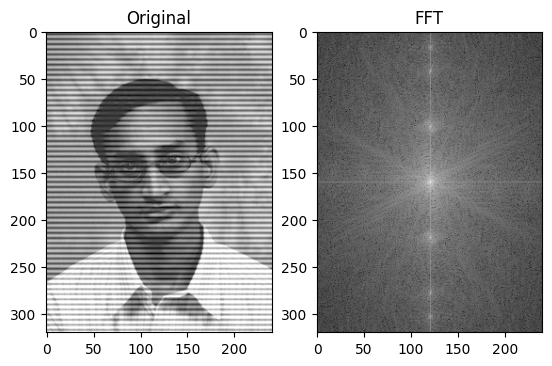

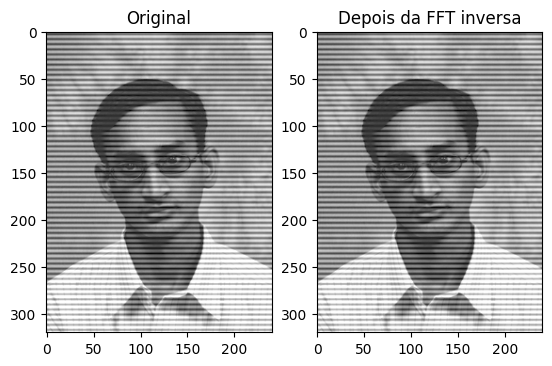

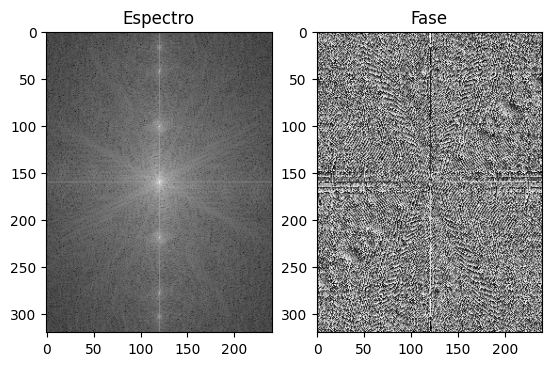

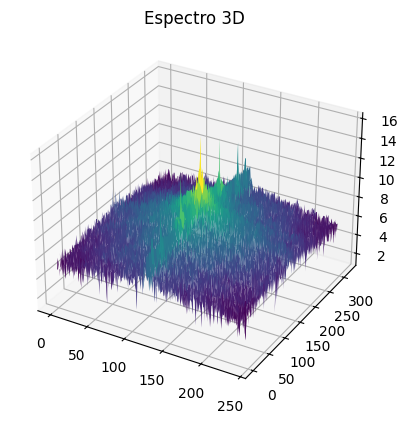

In [2]:
import datetime
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2

def plot(img, edit, txt1, txt2):

    if len(np.array(img).shape) == 3 and np.array(img).shape[2] == 3:
        img = np.mean(np.array(img), axis=2)
    if len(np.array(edit).shape) == 3 and np.array(edit).shape[2] == 3:
        edit = np.mean(np.array(edit), axis=2)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(txt1)
    ax[1].imshow(edit, cmap='gray')
    ax[1].set_title(txt2)
    plt.show()

def salvar(imagem, nome):
    print("Desenha salvar a imagem? (s/N)")
    entrada = input()
    if entrada == "s":
        time = datetime.datetime.now().strftime("%Y-%m-%d")
        imagem.save(f'imgs/{nome}{time}.png')

def fft(imagem):
    img = imagem.convert("L")
    img = np.array(imagem)
    fft = np.fft.fft2(img)
    fft = np.fft.fftshift(fft)
    return fft

def fftImage(imagem):
    transf = fft(imagem)
    transf = np.log(1 + np.abs(transf))
    transf = 255 * (transf - np.min(transf)) / (np.max(transf) - np.min(transf))

    return Image.fromarray(np.uint8(transf))

def inverse_fft(fft):
    ifft = np.fft.ifftshift(fft)
    ifft = np.fft.ifft2(ifft)
    return np.real(ifft)

def inverse_fftImage(fft):
    ifft = inverse_fft(fft)
    ifft = 255 * (ifft - np.min(ifft)) / (np.max(ifft) - np.min(ifft))

    return Image.fromarray(np.uint8(ifft))

def espectro(imagem):
    img = np.array(imagem)
    return np.fft.fftshift(np.fft.fft2(img))

def fase(imagem):
    img = np.array(imagem)
    return np.angle(np.fft.fftshift(np.fft.fft2(img)))

def plotFFT(imagem):
    e = espectro(imagem)
    f = fase(imagem)
    plot(np.log(1 + np.abs(e)), f, "Espectro", "Fase")

def plot3d(imagem):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    img = np.array(imagem)
    e = np.log(1 + np.abs(espectro(img)))
    x = np.arange(e.shape[1])
    y = np.arange(e.shape[0])
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, e, cmap='viridis')
    ax.set_title('Espectro 3D')
    plt.show()

def sinc(size = 512):
    img = np.ones((size, size), dtype=np.float32) * 255  

    square_size = 50
    center = size // 2
    half_square = square_size // 2
    img[center - half_square:center + half_square, center - half_square:center + half_square] = 0

    x = np.linspace(-10, 10, size)
    y = np.linspace(-10, 10, size)
    X, Y = np.meshgrid(x, y)
    sinc_func = np.sinc(np.sqrt(X**2 + Y**2))

    sinc_func_normalized = 255 * (sinc_func - sinc_func.min()) / (sinc_func.max() - sinc_func.min())

    img = img * sinc_func_normalized

    return Image.fromarray(img).convert("L")


def main():
    car = Image.open('imgs/car.tif')
    lena = Image.open('imgs/len_periodic_noise.png')
    newspaper = Image.open('imgs/newspaper_shot_woman.tif')
    indian = Image.open('imgs/periodic_noise.png')
    sincIMG = Image.open('imgs/sinc.png')
    imagem = None

    print("Escolha a imagem: ")
    print("1 - Car")
    print("2 - Lena")
    print("3 - Newspaper")
    print("4 - Indian")
    print("5 - Sinc")
    print("6 - Gerada")
    entrada = input()
    
    match entrada:
        case "1":
            imagem = car

        case "2":
            imagem = lena

        case "3":
            imagem = newspaper
        
        case "4":
            imagem = indian
        
        case "5":
            imagem = sincIMG
        
        case "6":
            imagem = sinc()

        case _:
            print("Opção inválida")
            exit()

    plot(imagem, fftImage(imagem), "Original", "FFT")

    plot(imagem, inverse_fftImage(fft(imagem)), "Original", "Depois da FFT inversa")

    plotFFT(imagem)

    plot3d(imagem)
    
if __name__ == "__main__":
    main()
